<a href="https://colab.research.google.com/github/Harshika-Chandvani/Data-Analysis/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss
from sklearn.cluster import KMeans

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
skewness = df.skew(axis = 0, skipna = True)
skewness

<ipython-input-5-399d0aa88123>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew(axis = 0, skipna = True)


id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

In [ ]:
kurtosis = df.kurt(axis = 0, skipna = True)
kurtosis

<ipython-input-6-cbe62efdd8d3>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurt(axis = 0, skipna = True)


id                   -1.212368
age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
avg_glucose_level     1.680479
bmi                   3.362659
stroke               15.589736
dtype: float64

<Axes: >

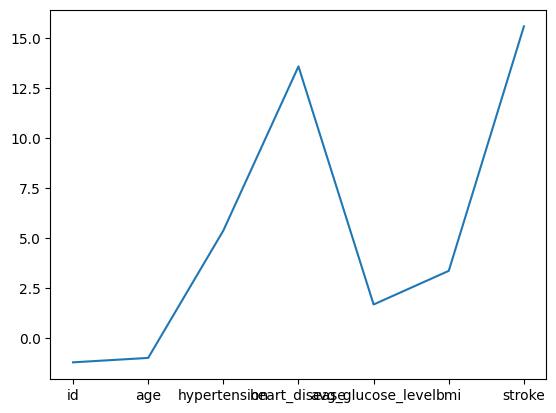

In [ ]:
kurtosis.plot()

<Axes: >

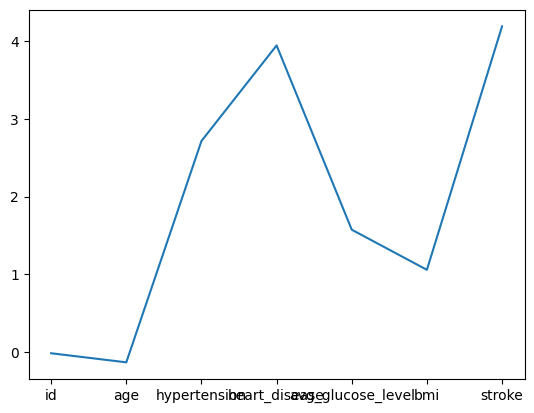

In [ ]:
skewness.plot()

In [ ]:
#understanding the data
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
#Preprocessing the data
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0,'Other':2})

df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed': 1,'children':2,'Govt_job':3,'Never_worked':4})

df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

df['smoking_status'] = df['smoking_status'].map({'never smoked': 0, 'Unknown': 1,'formerly smoked':2,'smokes':3})
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,1,228.69,36.6,2,1
1,51676,0,61.0,0,0,1,1,0,202.21,NaN,0,1
2,31112,1,80.0,0,1,1,0,0,105.92,32.5,0,1
3,60182,0,49.0,0,0,1,0,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,1,0,174.12,24.0,0,1
5,56669,1,81.0,0,0,1,0,1,186.21,29.0,2,1
6,53882,1,74.0,1,1,1,0,0,70.09,27.4,0,1
7,10434,0,69.0,0,0,0,0,1,94.39,22.8,0,1
8,27419,0,59.0,0,0,1,0,0,76.15,NaN,1,1
9,60491,0,78.0,0,0,1,0,1,58.57,24.2,1,1


In [ ]:
#checking if any attributes have null value
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Using DataFrame.mean() method to get column average
df["bmi"].mean()

28.893236911794666

In [ ]:
df.fillna('28.89', inplace = True)

In [ ]:
df.info()
df['bmi'] = df['bmi'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   object 
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 479.2+ KB


In [ ]:
df.dtypes
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [ ]:
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,1,228.69,36.60,2,1
1,51676,0,61.0,0,0,1,1,0,202.21,28.89,0,1
2,31112,1,80.0,0,1,1,0,0,105.92,32.50,0,1
3,60182,0,49.0,0,0,1,0,1,171.23,34.40,3,1
4,1665,0,79.0,1,0,1,1,0,174.12,24.00,0,1
5,56669,1,81.0,0,0,1,0,1,186.21,29.00,2,1
6,53882,1,74.0,1,1,1,0,0,70.09,27.40,0,1
7,10434,0,69.0,0,0,0,0,1,94.39,22.80,0,1
8,27419,0,59.0,0,0,1,0,0,76.15,28.89,1,1
9,60491,0,78.0,0,0,1,0,1,58.57,24.20,1,1


In [ ]:
#Splitting the data
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']].values
X[0:5]


array([[  1.  ,  67.  ,   0.  ,   1.  ,   1.  ,   0.  ,   1.  , 228.69,
         36.6 ,   2.  ],
       [  0.  ,  61.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  , 202.21,
         28.89,   0.  ],
       [  1.  ,  80.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  , 105.92,
         32.5 ,   0.  ],
       [  0.  ,  49.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  , 171.23,
         34.4 ,   3.  ],
       [  0.  ,  79.  ,   1.  ,   0.  ,   1.  ,   1.  ,   0.  , 174.12,
         24.  ,   0.  ]])

In [ ]:
y = df["stroke"]
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [ ]:
df.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.013892,-0.001403,0.001092,0.003009,-0.001713,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.033427,-0.006738,0.055180,-0.026113,0.067945,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.182384,0.014180,0.238171,0.325936,0.079205,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.030550,-0.007913,0.174474,0.160181,0.012531,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.030156,0.003092,0.161857,0.038891,0.063138,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.171142,0.006261,0.155068,0.335702,0.085086,0.108340
work_type,-0.013892,0.033427,-0.182384,-0.030550,-0.030156,-0.171142,1.000000,0.019358,-0.033069,-0.185050,-0.034079,-0.032098
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,0.019358,1.000000,-0.004946,-0.000121,0.032112,0.015458
avg_glucose_level,0.001092,0.055180,0.238171,0.174474,0.161857,0.155068,-0.033069,-0.004946,1.000000,0.168744,0.025186,0.131945
bmi,0.003009,-0.026113,0.325936,0.160181,0.038891,0.335702,-0.185050,-0.000121,0.168744,1.000000,0.046653,0.038935


<Axes: >

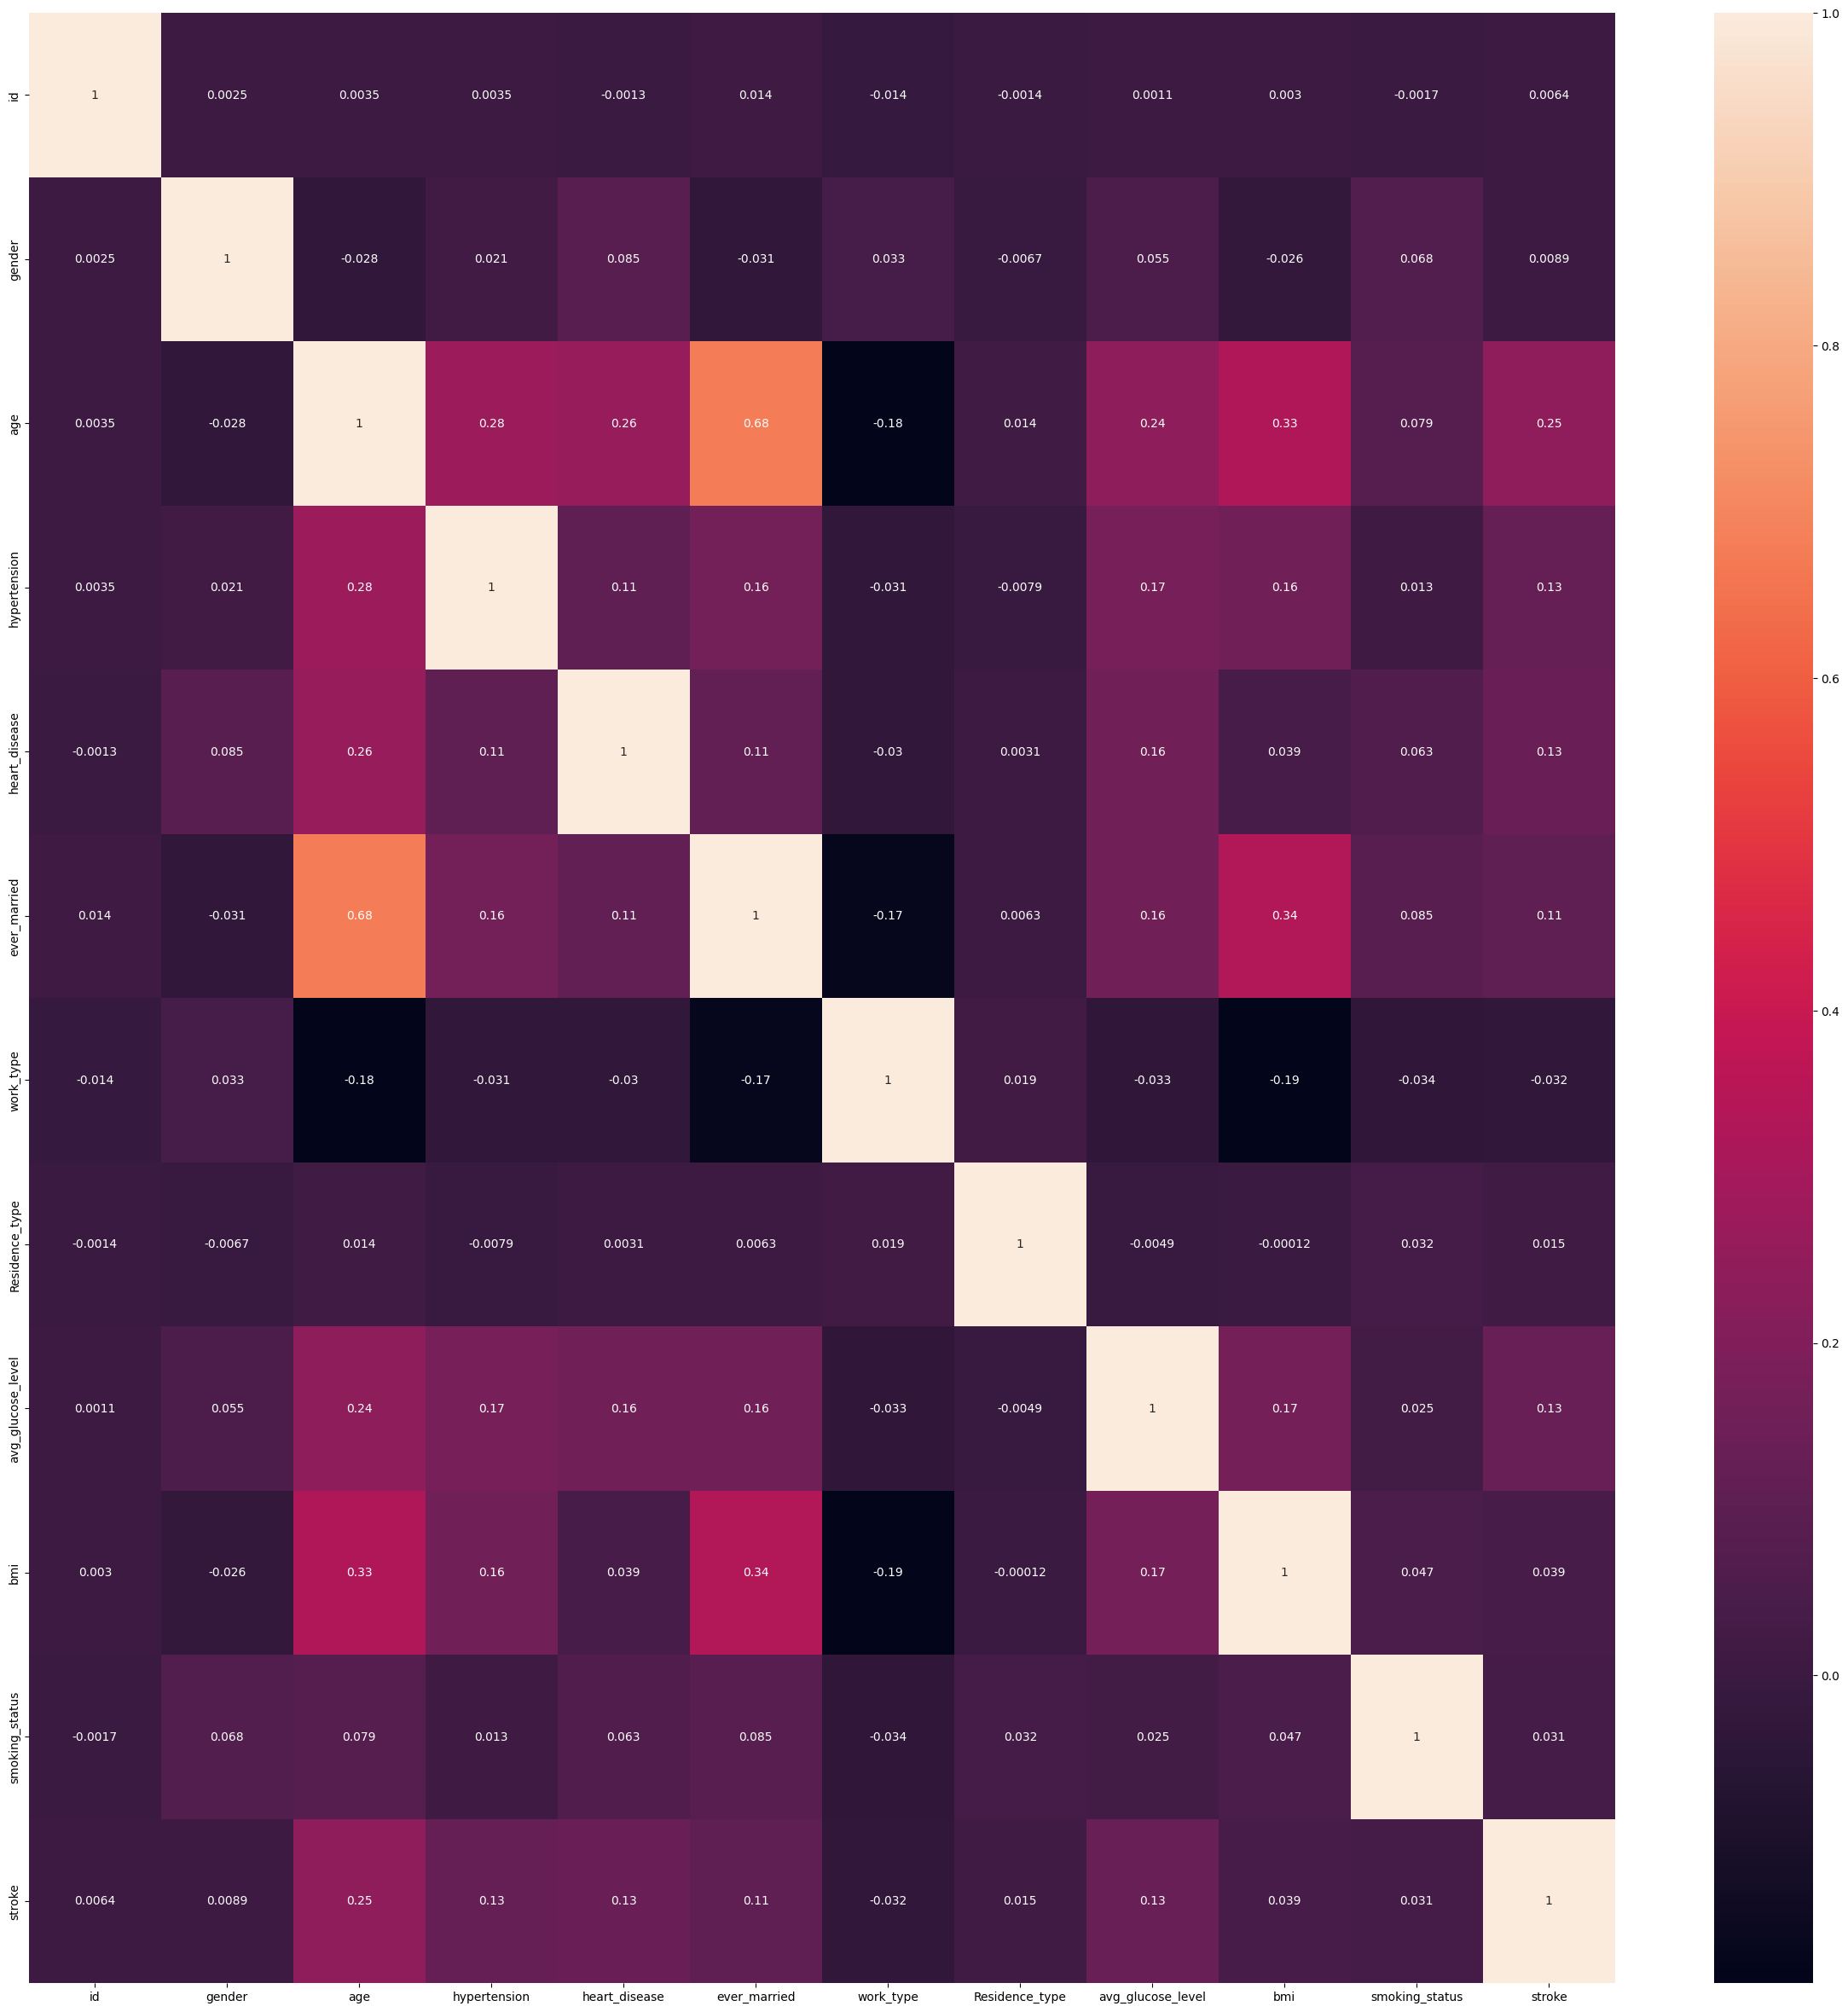

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.85)
len(set(corr_features))
# so there are no features that we can drop

0

In [ ]:
# CREATING TRAIN AND TESTING SET
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (1533, 10) &  Size of Y training set (1533,)
Shape of X training set (3577, 10) &  Size of Y training set (3577,)


In [ ]:
acc=[]
model=[]

In [ ]:
# CREATING MODEL
strokeTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
strokeTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
strokeTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
#prediction
trainTree = strokeTree.predict(X_trainset)
predTree = strokeTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

[0 0 0 0 0]
2778    0
4029    0
261     0
1868    0
1028    0
Name: stroke, dtype: int64


In [ ]:
# EVALUATION
Decision_Tree_Train=metrics.accuracy_score(y_trainset, trainTree)
Decision_Tree_Test=metrics.accuracy_score(y_testset, predTree)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9549902152641878


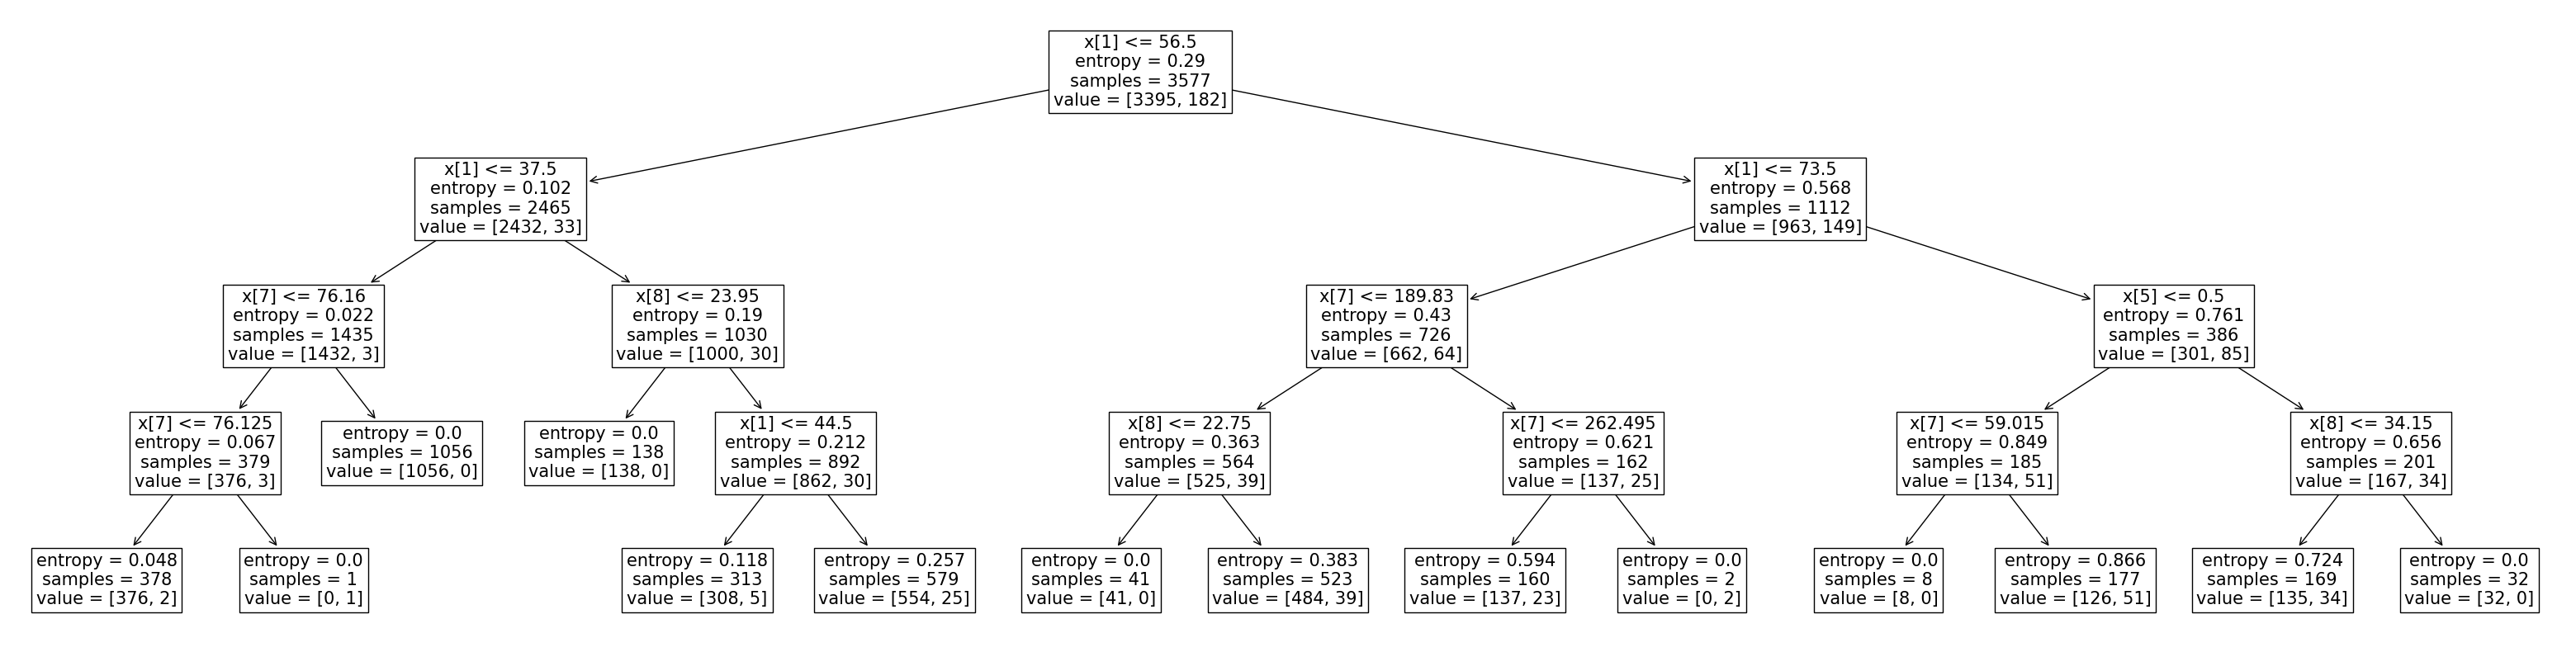

In [ ]:
fig, axe = plt.subplots(figsize=(40,10));
tree.plot_tree(strokeTree,ax = axe, fontsize=15)
plt.show()

In [ ]:
acc.append(Decision_Tree_Test)
model.append('Decision Tree')

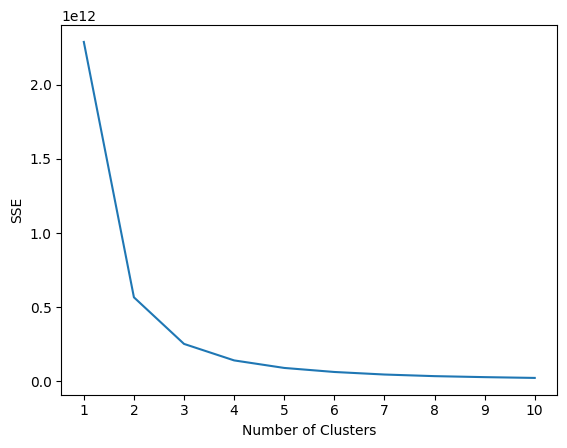

In [ ]:
# KNN
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
k = 2
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
neigh

KNeighborsClassifier(n_neighbors=2)

In [ ]:
yhat = neigh.predict(X_testset)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
KNN_Train=metrics.accuracy_score(y_trainset, neigh.predict(X_trainset))
KNN_Test=metrics.accuracy_score(y_testset, yhat)
print("Train set Accuracy: ",KNN_Train )
print("Test set Accuracy: ",KNN_Test )

Train set Accuracy:  0.9572267263069612
Test set Accuracy:  0.9523809523809523


In [ ]:
acc.append(KNN_Test)
model.append('KNN')

In [ ]:
#LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
ytrain = LR.predict(X_trainset)
ytrain
yhat = LR.predict(X_testset)
yhat
# each of this is the probability of the person getting a stroke..such a prediction is desirable

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ytrain_prob=LR.predict_proba(X_trainset)
ytrain_prob
yhat_prob = LR.predict_proba(X_testset)
yhat_prob

array([[0.94644078, 0.05355922],
       [0.98111753, 0.01888247],
       [0.99290591, 0.00709409],
       ...,
       [0.96669825, 0.03330175],
       [0.93400133, 0.06599867],
       [0.9196816 , 0.0803184 ]])

In [ ]:
# EVALUATING
Logistic_Regression_Train=jaccard_score(y_trainset, ytrain,pos_label=0)
Logistic_Regression_Train
Logistic_Regression_Test=jaccard_score(y_testset, yhat,pos_label=0)
Logistic_Regression_Test

0.954337899543379

In [ ]:
acc.append(Logistic_Regression_Test)
model.append('Logistic Regression')

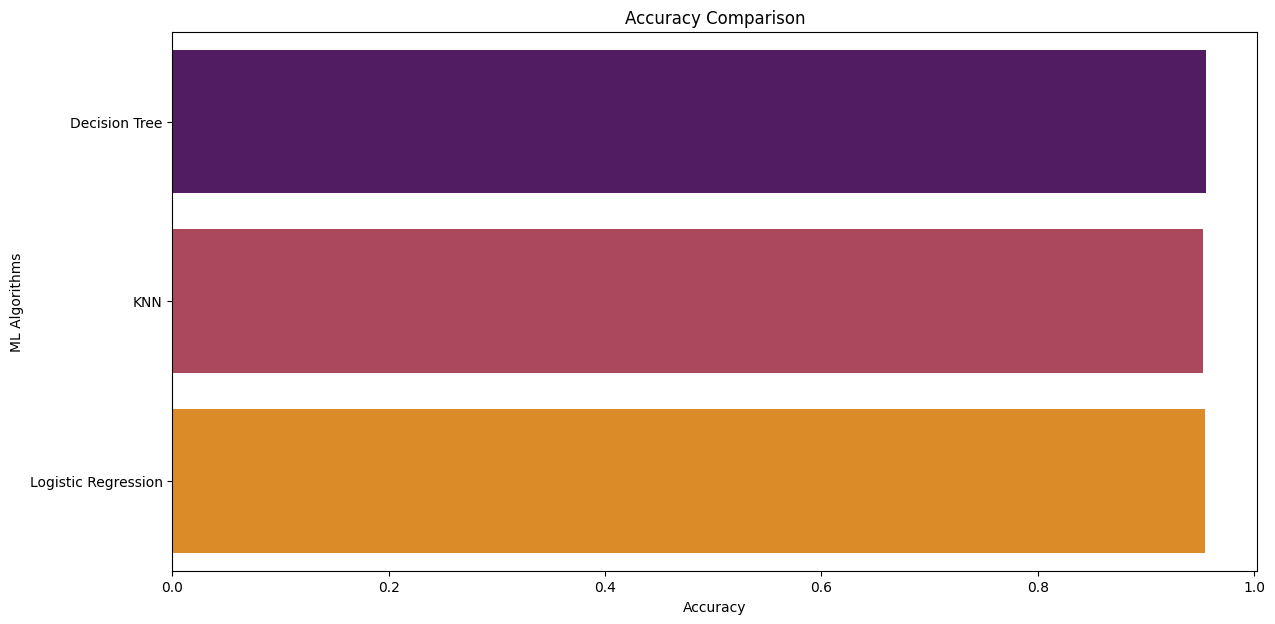

In [ ]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='inferno')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')